## **LGM-VIP Data Science Internship Programme**

**Advanced Level Task-1 : Develop A Neural Network That Can Read Handwriting**

**Author : S Sreevatsav**

**Language : Python**


# **Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import MaxPool2D
from keras.layers import Conv2D


# **Loading Training and Test Data**

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


### **Single Digit Image**

(-0.5, 27.5, 27.5, -0.5)

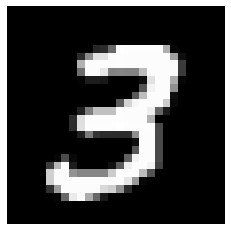

In [ ]:
plt.imshow(X_train[7],cmap='gray',interpolation='none')
plt.axis('off')

In [ ]:
y_train[7]

3

In [ ]:
y_train = y_train.astype(np.int8) # converts string to int
y_test = y_test.astype(np.int8)
y_train_3 = (y_train==3)
y_test_3 = (y_test==3)
y_train_3

array([False, False, False, ..., False, False, False])

In [ ]:
X_train = np.expand_dims(X_train, axis=-1)
X_train = X_train.astype('float32') / 255

In [ ]:
X_train.shape

(60000, 28, 28, 1)

# **3 Predictor Model**

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters=28, kernel_size=3, activation='relu', input_shape=[28,28,1]))

In [ ]:
model.add(MaxPool2D(pool_size=2, strides=2))

In [ ]:
model.add(Conv2D(filters=28, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=128, activation='relu'))

In [ ]:
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(X_train,y_train_3, epochs = 25)

Epoch 1/25
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0446 - accuracy: 0.9843
Epoch 2/25
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0115 - accuracy: 0.9964
Epoch 3/25
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0069 - accuracy: 0.9977
Epoch 4/25
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0056 - accuracy: 0.9984
Epoch 5/25
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0034 - accuracy: 0.9989
Epoch 6/25
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0034 - accuracy: 0.9990
Epoch 7/25
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0023 - accuracy: 0.9992
Epoch 8/25
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0021 - accuracy: 0.9994
Epoch 9/25
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0013 - accuracy: 0.9996
Epoch 10/25
1875/1875 [==============================] - 29s 15m

# **Predicting using built Model**

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(y_pred.astype(bool),y_test_3))
print(accuracy_score(y_test_3,y_pred.astype(bool)))

[[8984    9]
 [   6 1001]]
0.9985
